<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Modelo
---





Aqui, criamos um dicionário de têrmos (palavras) sobre a biografia da visionário **Elon Musk**. 

1. A primeira célula obtém o texto da biografia da atriz na variável `texto`. 
2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf


A sua tarefa pode empregar outros textos de seu interesse, inclusive em inglês e outras línguas de mesmas características (francês, alemão, espanhol etc.), e você também pode querer empregar arquivos locais. Existem inúmeros pré- tratamentos possíveis nos dados e diferentes formas de exibir os dados. Para o pré tratamento você pode incluir outras transformações para melhorar a qualidade do seu dicionário. Para exibição dos dados você pode empregar o mesmo código ou buscar uma outra forma de sua preferência.

## Aquisição dos Dados

In [4]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('http://dontpad.com/makenzieIgorSilva.txt'): 
    texto.append(line.decode('utf-8'))

# f = open('/ElonMusk.txt','r')    # para arquivos locais
# for line in f:
#    texto.append(line)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    


# Construção do Dicionário

In [5]:
dicionario = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in dicionario.keys():         # se palavra não está no dicionário 
      dicionario[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      dicionario[word] =  dicionario[word] + 1    # apenas soma 1 ao valor já existente

print(dicionario)    

{'juventude': 1, 'infância': 3, 'musk': 171, 'nasceu': 2, 'em': 196, '28': 2, 'de': 455, 'junho': 9, '1971': 1, 'pretória': 1, 'transvaal': 1, 'áfrica': 1, 'do': 130, 'sul[6]': 1, 'filho': 2, 'maye': 1, 'née': 1, 'haldeman': 1, 'modelo': 2, 'e': 177, 'nutricionista': 1, 'regina': 1, 'saskatchewan': 1, 'canadá[7]': 1, 'errol': 1, 'um': 124, 'engenheiro': 1, 'eletromecânico': 1, 'piloto': 2, 'marinheiro': 1, 'sul-africano': 1, 'ele': 53, 'tem': 20, 'irmão': 1, 'mais': 36, 'novo': 5, 'kimbal': 1, 'nascido': 1, '1972': 1, 'uma': 91, 'irmã': 2, 'nova': 5, 'tosca': 2, '1974[7][8][9][10]': 1, 'sua': 18, 'avó': 1, 'paterna': 1, 'era': 7, 'britânica': 1, 'também': 12, 'possui': 1, 'ascendência': 1, 'holandesa[11][12]': 1, 'seu': 25, 'avô': 1, 'materno': 1, 'estadunidense': 1, 'minnesota[13]': 1, 'depois': 20, 'que': 205, 'seus': 8, 'pais': 1, 'se': 39, 'divorciaram': 1, '1980': 1, 'viveu': 1, 'principalmente': 5, 'com': 75, 'pai': 1, 'nos': 12, 'subúrbios': 1, 'pretória[11]': 1, 'mas': 18, 'dis

# Exibição dos Resultados

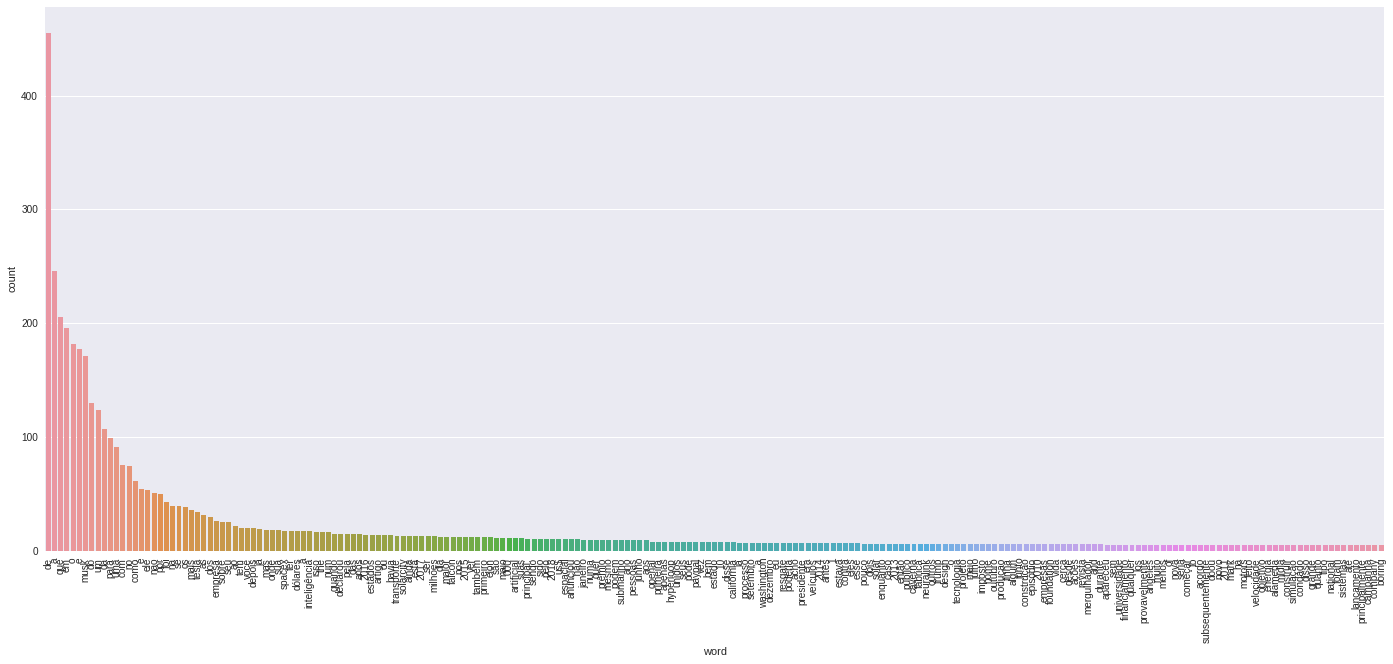

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(dicionario.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()